,PM25
Neighborhood,
Chartiers City,12.157559
Upper Lawrenceville,12.157773
Summer Hill,12.160112
Morningside,12.162134
East Carnegie,12.169079
...,...
Glen Hazel,12.379904
Swisshelm Park,12.385153
Hays,12.386745


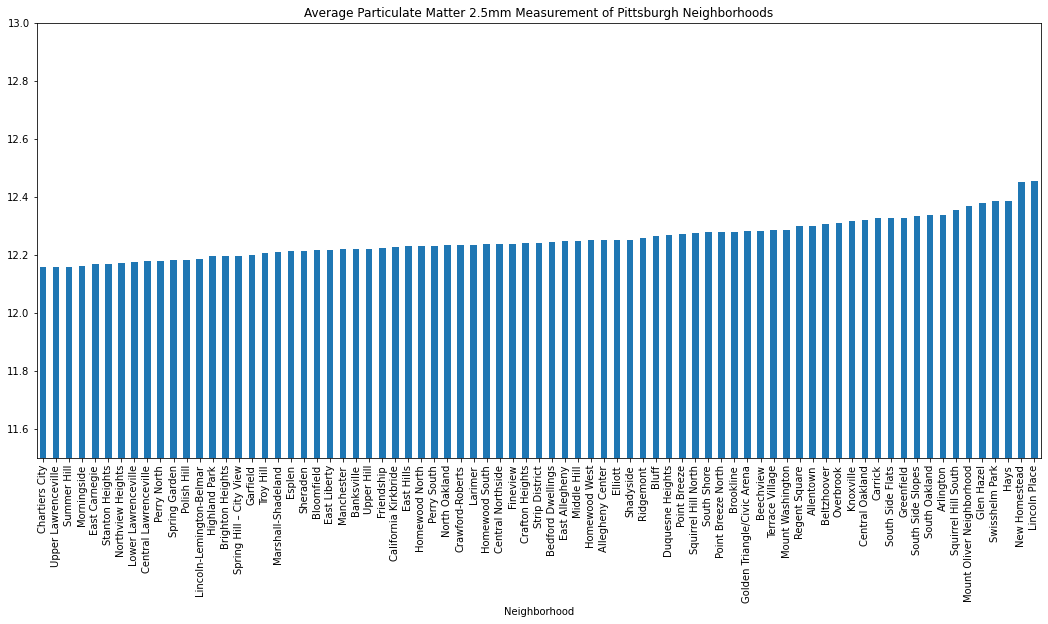

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np

# Get data files as pandas dataframes
particulate_matter_pd = pd.read_csv("datasets/particulate_matter.csv")
pitt_census_tracts_pd = pd.read_csv("datasets/Pittsburgh_Census_Tracts.csv", encoding='cp1252') # there were encoding errors with utf-8, I just guessed the encoding of the file

# Only want census tracts from year 2010
census_tracts_mask = pitt_census_tracts_pd['Year'] == 2010
pitt_census_tracts_pd = pitt_census_tracts_pd[census_tracts_mask]

# Converts the census tracts to floats (there may also be more than one tract per entry)
def split_and_float(tract):
    tract_split = tract.split(', ')
    final_arr = []
    for tract in tract_split:
        final_arr.append(float(tract))
    return final_arr
pitt_census_tracts_pd['FloatTracts'] = pitt_census_tracts_pd['Census Tracts'].apply(split_and_float)

# For some reason the census tracts in this file are multiplied by 100
particulate_matter_pd['RealTract'] = particulate_matter_pd['CensusTract'] / 100

# Identifies the Neighborhood of each census tract and attaches it to particulate matter dataframe (this is really slow but necessary since there are neighborhoods with multiple census tracts)
def find_neighborhood(tract):
    for index, row in pitt_census_tracts_pd.iterrows():
        if tract in row['FloatTracts']:
            return row['Neighborhood']
    return None
particulate_matter_pd['Neighborhood'] = particulate_matter_pd['RealTract'].apply(find_neighborhood)
part_mask = particulate_matter_pd['Neighborhood'] != None
particulate_matter_pd = particulate_matter_pd[part_mask]

# We don't need the census tracts anymore now that the neighborhoods are matched up
particulate_matter_pd.drop(["CensusTract", "RealTract"], axis=1, inplace=True)

# Merges rows with same neighborhood, pm rating is the mean of all pm ratings of the neighborhood
merge_guide = {'PM25': 'mean'}
particulate_matter_pd = particulate_matter_pd.groupby(particulate_matter_pd['Neighborhood']).aggregate(merge_guide)

# Order neighborhoods by PM25 rating, going from lowest to highest
particulate_matter_pd.sort_values(by=["PM25"], inplace=True)

# Plot a bar graph of the data
particulate_matter_pd.plot(kind="bar", title="Average Particulate Matter 2.5mm Measurement of Pittsburgh Neighborhoods", figsize=(18, 8), ylim=(11.5, 13), legend=False)

particulate_matter_pd
#particulate_matter_pd.info()


